# 차원 축소

## Feature selection & Feature extraction
feature selection:  중요한 feature 를 전체 feature 중에 선택  
feature extract:  전체 feature를 적은 수의 feature로 융합하는 방법 

### Feature selection 

### Feature extration

#### t-SNE(Visualizing Data using t-SNE, Laurens van der Maaten, 2008)

SNE(Stochastic Neighbor Embedding) 방법:  n 차원에 분포된 이산 데이터를 k(n 이하의 정수) 차원으로 축소하며 거리 정보를 보존하되, 거리가 가까운 데이터의 정보를 우선하여 보존하기 위해 고안, return gaussian distribution

LLE(Locally Linear Embedding) 방법: return True, False

# t-SNE

## with sklearn

import numpy as np
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE

mnist = fetch_openml('mnist_784')

In [21]:
mnist.data.shape

(70000, 784)

In [24]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

직접 t-SNE 한 경우 계산 비용이 큼

In [6]:
%time
X_embedded = TSNE(n_components=2).fit_transform(mnist.data)

PCA 후 t-SNE

In [11]:
from sklearn.decomposition import PCA

%time 
pca = PCA(n_components = 30).fit_transform(mnist.data)
PCAX_embedded= TSNE(n_components = 2).fit_transform(pca)

Wall time: 0 ns


In [19]:
PCAX_embedded

array([[  8.930249  ,  -3.787363  ],
       [ 42.8062    ,  14.529936  ],
       [ 25.220074  , -34.5009    ],
       ...,
       [  0.86746734, -47.777996  ],
       [ 14.755172  , -16.595337  ],
       [ 34.391094  ,  -6.197406  ]], dtype=float32)

c:\users\seong\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

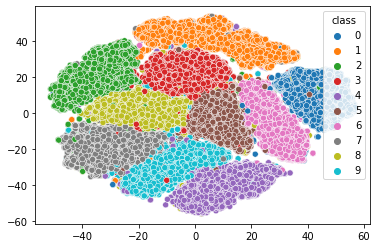

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(*zip(*PCAX_embedded), hue = mnist.target)

python 구현

In [31]:
import math
import numpy as np

class t_SNE():
    '''
    '''
    
    def __init__():
    
    def p_j_i(Mdist, sigma, i, j):
        '''
                #p_j/i의 분자 계산
        '''
        norm = Mdist[i,j]**2
        return np.exp(-1*norm)/(2*sigma**2)

    def Sigma_perplexity(perplexity, Mdist):
        '''
            perplexity(평가 지표)가 있을 때, sigma의 결정 함수
        '''
        size = Mdist.shape
        SIGMA =  [0]*size[0]
        for i in range(0, size[0]):
            for s in range(0,100)
                sigma = 0.1*(s+1)
                pji = [0]*size[0]
                for j in range (0,size[0]):
                    pji[j] = p_j_i(Mdist, sigma, i ,j)
                pji = pji/sum(pji)

                H = 0
                for j in range(0, size[0]):
                    H=H+((-1)*pji[j]*math.log2(pji[j]))
                x = 2**H
                if np.abs(perplexity-x)<1:
                    SIGMA[i] = sigma
                    break
        return SIGMA

    def matrix_pij(SIGMA, Mdist):
        '''
            Symetric P_ij 행렬
        '''
        
        size = Mdist.shape
        p_ij = np.zeros((size[0], size[0]))
        pi_j = np.zeros((size[0], size[0]))
        
        for i in range(0,size[0])
            pij = [0]*size[0]
            for j in range(0,size[0]):
                pij[j] = p_j_i(Mdist, SIGMA[i], i, j)
            pij = pji/sum(pji)
            p_ij[i, :] = pji
            
        for i in range(0, size[0]-1):
            for j in range(i+1,size[0]):
                pi_j[i,j] = p_ij[i,j]+pi_j[j,i]/(2*size[0])
                pi_j[j,i] = pi_j[i,j]
        return pi_j
    
    def matrix_qij(Ydist):
        '''
            Symetric P_ij 행렬
        '''
        
        size = Ydist.shape
        q_ij = np.zeros((size[0], size[0]))
        qi_j = np.zeros((size[0], size[0]))
        
        for i in range(0,size[0])
            qij = [0]*size[0]
            for j in range(0,size[0]):
                qij[j] = 1/(1+(Ydist[i,j]**2))
            qij = qji/sum(qji)
            q_ij[i, :] = qji
            
        for i in range(0, size[0]-1):
            for j in range(i+1,size[0]):
                qi_j[i,j] = q_ij[i,j]+qi_j[j,i]/(2*size[0])
                qi_j[j,i] = qi_j[i,j]
        return qi_j    
    
    def https://m.blog.naver.com/xorrms78/222112752837

IndentationError: expected an indented block (<ipython-input-31-69f2e54bbcca>, line 10)